In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, scale
import matplotlib.pyplot as plt






ModuleNotFoundError: No module named 'tensorflow'

In [4]:
AAPL = pd.read_csv('../data/transactions/Tech/AAPL.csv')  
GOOG = pd.read_csv('../data/transactions/Tech/GOOG.csv')  
FB = pd.read_csv('../data/transactions/Tech/FB.csv')  
MSFT = pd.read_csv('../data/transactions/Tech/MSFT.csv')  
AMZN = pd.read_csv('../data/transactions/Tech/AMZN.csv') 

ALK = pd.read_csv('../data/transactions/Airline/ALK.csv')  
DAL = pd.read_csv('../data/transactions/Airline/DAL.csv')  
LUV = pd.read_csv('../data/transactions/Airline/LUV.csv')  
RYAAY = pd.read_csv('../data/transactions/Airline/RYAAY.csv')  
SAVE = pd.read_csv('../data/transactions/Airline/SAVE.csv') 

JACK = pd.read_csv('../data/transactions/Fastfood/JACK.csv')  
MCD = pd.read_csv('../data/transactions/Fastfood/MCD.csv')  
TACO = pd.read_csv('../data/transactions/Fastfood/TACO.csv')  
WEN = pd.read_csv('../data/transactions/Fastfood/WEN.csv')  
YUM = pd.read_csv('../data/transactions/Fastfood/YUM.csv') 

GS = pd.read_csv('../data/transactions/Finance/GS.csv')  
JPM = pd.read_csv('../data/transactions/Finance/JPM.csv')  
MER = pd.read_csv('../data/transactions/Finance/MER-PK.csv')  
MS = pd.read_csv('../data/transactions/Finance/MS.csv')  
WFC = pd.read_csv('../data/transactions/Finance/WFC.csv') 

COST = pd.read_csv('../data/transactions/Retailer/COST.csv')  
HD = pd.read_csv('../data/transactions/Retailer/HD.csv')  
KR = pd.read_csv('../data/transactions/Retailer/KR.csv')  
TGT = pd.read_csv('../data/transactions/Retailer/TGT.csv')  
WMT = pd.read_csv('../data/transactions/Retailer/WMT.csv') 

In [5]:
def getStock(stock):
    date = pd.to_datetime(stock["Date"])

    stock = stock.drop(['Date'],axis=1)
    stock= stock.astype('float64')
    #stock['month'] = month = np.array(date.dt.month)
    #stock['day'] = month = np.array(date.dt.day)
    value = pd.Series(stock['Close']-stock['Close'].shift(1), index=stock.index) 
    value = value.bfill() 
    value = np.array(value) 
    
    return scale(stock), value

def processData(stock, input_unit,output_unit):
    data,result = getStock(stock)
    X,Y = [],[]
    for i in range(len(data)-input_unit-output_unit):
        X.append(data[i:(i+input_unit)])
        temp = [result[j+i+input_unit] for j in range(output_unit)]
        Y.append(temp)
    return np.array(X),np.array(Y)

X,y = processData(AAPL,10,1)
train_size = int(X.shape[0]*0.80)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]




NameError: name 'scale' is not defined

In [171]:
# basic model

model = Sequential() # most common
model.add(LSTM(256, input_shape = (10,6))) 
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False,callbacks=[callback])

Train on 997 samples, validate on 250 samples
Epoch 1/300
997/997 [==============================] - 3s 3ms/step - loss: 0.1492 - val_loss: 0.0818
Epoch 2/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0091 - val_loss: 0.0330
Epoch 3/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0093 - val_loss: 0.1354
Epoch 4/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0160 - val_loss: 0.0223
Epoch 5/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0128 - val_loss: 0.1695
Epoch 6/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0138 - val_loss: 0.0221
Epoch 7/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0090 - val_loss: 0.0847
Epoch 8/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0071 - val_loss: 0.0231
Epoch 9/300
997/997 [==============================] - 1s 1ms/step - loss: 0.0060 - val_loss: 0.0687
Epoch 10/300
997/997 [=======================

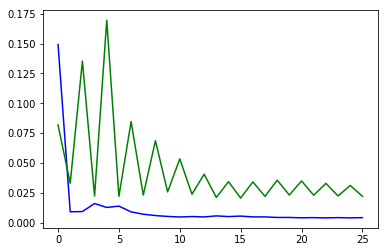

In [173]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="green")
plt.show()

In [241]:
def category2(data, threshold):
    top = threshold*(max(data)-min(data))+sum(data)/len(data)
    bottom = -1*threshold*(max(data)-min(data))+sum(data)/len(data)
    print(top,bottom)
    new_data = []
    for item in data:
        if item >= top:
            new_data.append(1)
        elif item < bottom:
            new_data.append(-1)
        else:
            new_data.append(0)
    return new_data
def category(data):
    data[data>=0] = 1
    data[data<0] = -1
    return data
    
def precentage(prediction, real):
    pred = prediction -real
    pred = np.squeeze(prediction, axis=1)
    pred = category(pred)
   
    return pred
def realPrecentage(stock):
    value = pd.Series(stock['Close']-stock['Close'].shift(1), index=stock.index) 
    value = value.bfill() 
    value = np.array(value) 
    val = category(value)
   

    return val
def compare(pred, val):
    #print(pred[:1000])
    #print(val[:1000])
    t = len(pred)
    countTrue = 0
    for i in range(t):
        if pred[i] == val[i]:
            countTrue +=1
    return countTrue/t

In [282]:
test = WEN 

#ALK = pd.read_csv('../data/transactions/Airline/ALK.csv')  
#DAL = pd.read_csv('../data/transactions/Airline/DAL.csv')  
#LUV = pd.read_csv('../data/transactions/Airline/LUV.csv')  
#RYAAY = pd.read_csv('../data/transactions/Airline/RYAAY.csv')  
#SAVE = pd.read_csv('../data/transactions/Airline/SAVE.csv') 

#JACK = pd.read_csv('../data/transactions/Fastfood/JACK.csv')  
#MCD = pd.read_csv('../data/transactions/Fastfood/MCD.csv')  
#TACO = pd.read_csv('../data/transactions/Fastfood/TACO.csv')  
#WEN = pd.read_csv('../data/transactions/Fastfood/WEN.csv')  
#YUM = pd.read_csv('../data/transactions/Fastfood/YUM.csv') 

#GS = pd.read_csv('../data/transactions/Finance/GS.csv')  
#JPM = pd.read_csv('../data/transactions/Finance/JPM.csv')  
#MER = pd.read_csv('../data/transactions/Finance/MER-PK.csv')  
#MS = pd.read_csv('../data/transactions/Finance/MS.csv')  
#WFC = pd.read_csv('../data/transactions/Finance/WFC.csv') 

#COST = pd.read_csv('../data/transactions/Retailer/COST.csv')  
#HD = pd.read_csv('../data/transactions/Retailer/HD.csv')  
#KR = pd.read_csv('../data/transactions/Retailer/KR.csv')  
#TGT = pd.read_csv('../data/transactions/Retailer/TGT.csv')  
#WMT = pd.read_csv('../data/transactions/Retailer/WMT.csv') 

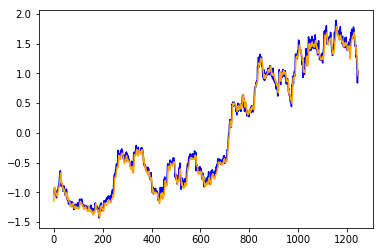

In [283]:
inputg,outputg = processData(test,10,1)


prediction = model.predict(inputg)

real = outputg
plt.plot(real,color="blue")
plt.plot(prediction,color="orange")
plt.show()

#print(prediction)
#print(real)

In [284]:


pred = precentage(prediction, real)
val = realPrecentage(test)

compare(pred, val)

0.5020048115477145